<a href="https://colab.research.google.com/github/Neu-Utkarsh/Hands-on-ML-O-Reily-/blob/main/Chapter-5/SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Making plot font for more consistency

plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('figure',titlesize=14)

## Linear SVM Classification

In [23]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [24]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [27]:
X_new = [[5.5,1.7],[5,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [28]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

## Non Linear SVM Classification

In [29]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10,max_iter= 10_000, random_state=42))
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

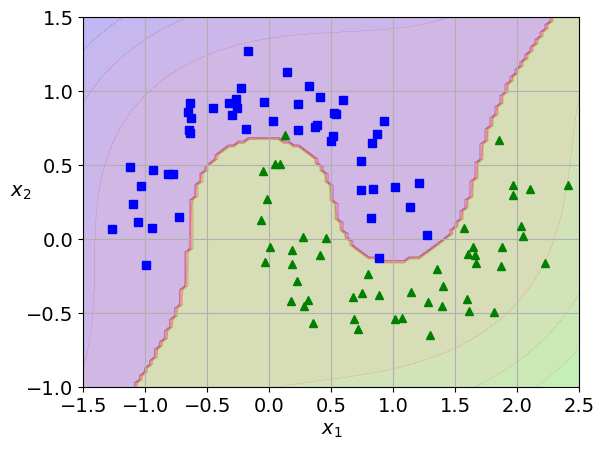

In [30]:
def plot_dataset(X,y, axes) :
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$', rotation=0)

def plot_predictions(clf, axes) :
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.show()

### Polynomial Kernel

In [31]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel = 'poly', degree=3,coef0=1,C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf = make_pipeline(StandardScaler(),
                                       SVC(kernel='poly',degree=10, coef0=100,C=5))
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

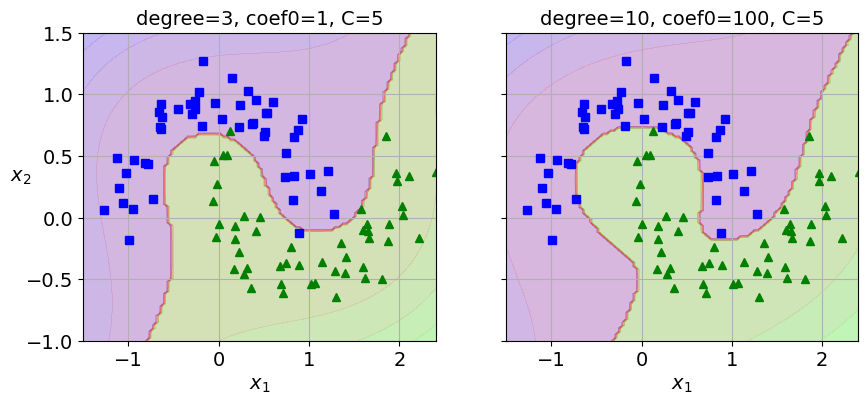

In [33]:
fig,axes = plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

### Gaussian RBF kernel

In [34]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [35]:
gamma1, gamma2 = 0.1,5
C1, C2 = 0.001,1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma,C in hyperparams :
  rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                     SVC(kernel='rbf', gamma=gamma, C=C))
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)



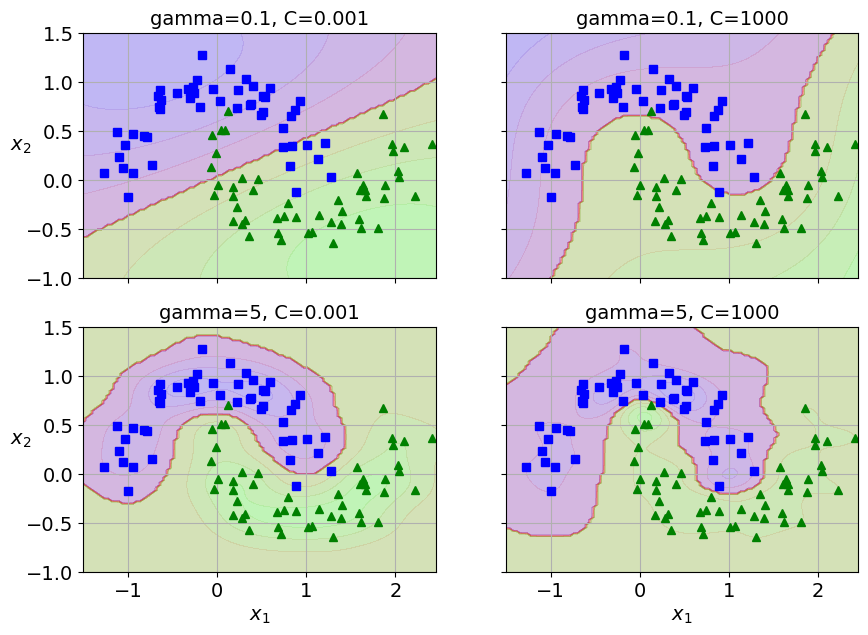

In [36]:
fig,axes = plt.subplots(2,2,figsize=(10,7),sharey=True, sharex=True)

for i,svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

## SVM Regression

In [38]:
from sklearn.svm import LinearSVR

# Dataset
np.random.seed(42)
X = 2 * np.random.rand(50,1)
y = 4 + 3* X[:,0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=1.5, random_state=42))
svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.5, random_state=42))])

In [45]:
def find_support_vectors(svm_reg,X,y):
  y_pred = svm_reg.predict(X)
  epsilon = svm_reg[-1].epsilon
  off_margin = np.abs(y-y_pred) >= epsilon
  return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0],axes[1],100).reshape(100,1)
  y_pred = svm_reg.predict(x1s)
  epsilon = svm_reg[-1].epsilon

  plt.plot(x1s,y_pred,'k-',label=r"$\hat{y}$",zorder=-2)
  plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
  plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
  plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
  plt.plot(X, y, "bo")
  plt.xlabel("$x_1$")
  plt.legend(loc="upper left")
  plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])



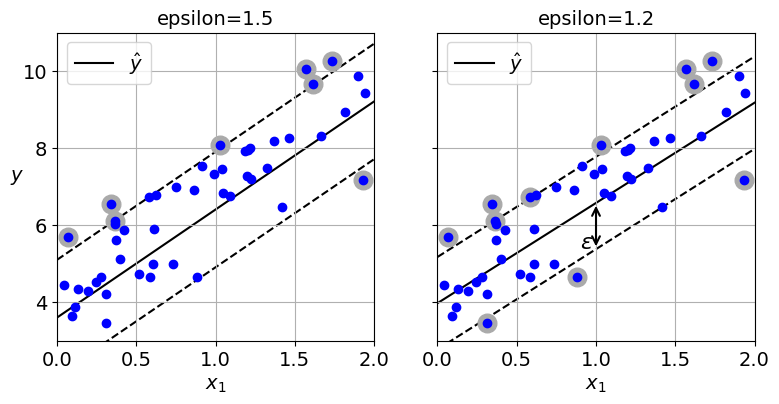

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

plt.show()

In [47]:
from sklearn.svm import SVR

# A simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

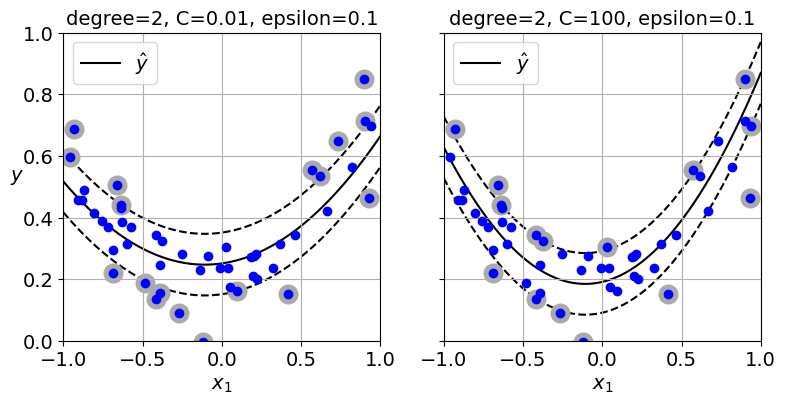

In [49]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()